# CIFAR 10

Date: 2023/08/17, 2023/08/18, 2023/08/19

https://www.cs.toronto.edu/~kriz/cifar.html

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from keras.utils import to_categorical
from keras import preprocessing
from keras import layers
from keras import models

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [61]:
# A function to unpickle CIFAR 10 Python version dataset
def unpickle(filepath):
    import pickle
    with open(filepath, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [62]:
# Director yof CIFAR 10 dataset
CIFAR10_DIR = 'cifar-10-batches-py'
os.listdir(CIFAR10_DIR)

['.ipynb_checkpoints',
 'batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

In [63]:
data1 = unpickle(CIFAR10_DIR + '/data_batch_1')
data2 = unpickle(CIFAR10_DIR + '/data_batch_2')
data3 = unpickle(CIFAR10_DIR + '/data_batch_3')
data4 = unpickle(CIFAR10_DIR + '/data_batch_4')
data5 = unpickle(CIFAR10_DIR + '/data_batch_5')
test = unpickle(CIFAR10_DIR + '/test_batch')
data1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [64]:
data = [data1, data2, data3, data4, data5]
for i in range(0, 5):
    print('[batch{}] labels: {}, data: {}'.format(i+1, len(data[i][b'labels']), len(data[i][b'data'])))

[batch1] labels: 10000, data: 10000
[batch2] labels: 10000, data: 10000
[batch3] labels: 10000, data: 10000
[batch4] labels: 10000, data: 10000
[batch5] labels: 10000, data: 10000


In [65]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

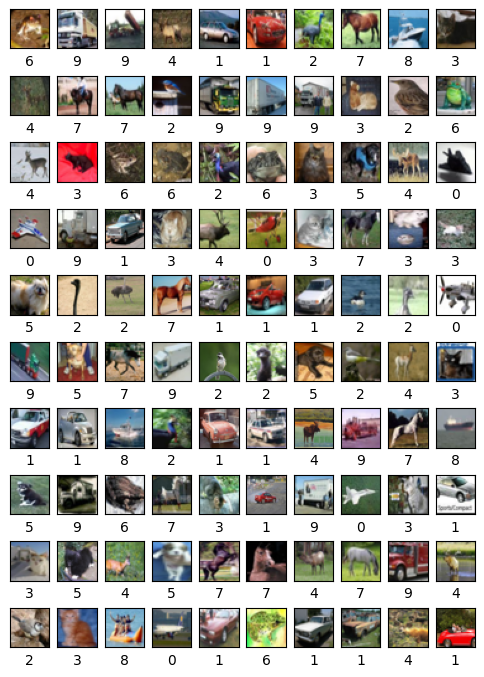

In [67]:
# CIFAR 10 dataset visualization (10 x 10)

fig, axes = plt.subplots(10,10, figsize=(6,8.5))

for i in range(10):
    for j in range(10):
        idx = i + j * 10
        d = data1[b'data'][idx]
        img = d.reshape(3,32,32)
        img = np.transpose(img, [1,2,0])  # shape (3,32,32) to (32,32,3)
        ax = axes[j,i]
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(data1[b'labels'][idx])
        #ax.set(xlabel=None)

## Preperation

In [68]:
train_data = np.transpose(data1[b'data'].reshape(10000, 3, 32, 32), [0, 2, 3, 1])
val_data = np.transpose(data2[b'data'].reshape(10000, 3, 32, 32), [0, 2, 3, 1])
test_data = np.transpose(test[b'data'].reshape(10000, 3, 32, 32), [0, 2, 3, 1])
train_labels = to_categorical(data1[b'labels'])
val_labels = to_categorical(data2[b'labels'])
test_labels = to_categorical(test[b'labels'])

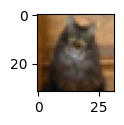

In [69]:
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(train_data[26])

In [70]:
classes[np.argmax(train_labels[26])]

'cat'

In [71]:
# Normalization
train_data = (train_data - np.mean(train_data))/np.std(train_data)
val_data = (val_data - np.mean(val_data))/np.std(val_data)
test_data = (test_data - np.mean(test_data))/np.std(test_data)

In [72]:
# Image generator

params = {
    'rotation_range': 20,
    'horizontal_flip': True,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'featurewise_center': True,
    'featurewise_std_normalization': True
}

generator = preprocessing.image.ImageDataGenerator(**params)
train_iter = generator.flow(x=train_data, y=train_labels)
val_iter = generator.flow(x=val_data, y=val_labels)

In [73]:
## Neural Network

In [74]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_28 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_29 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [76]:
from keras import optimizers
model.compile(optimizer=optimizers.SGD(learning_rate=.1, momentum=.9), loss='categorical_crossentropy', metrics=['accuracy'])

## Training

In [79]:
EPOCHS = 160
history = model.fit(train_iter, epochs=EPOCHS, validation_data=val_iter)

Epoch 1/160
313/313 [==============================] - 63s 192ms/step - loss: 2.1486 - accuracy: 0.2560 - val_loss: 2.2121 - val_accuracy: 0.2780
Epoch 2/160
313/313 [==============================] - 60s 190ms/step - loss: 1.8298 - accuracy: 0.3194 - val_loss: 1.7842 - val_accuracy: 0.3448
Epoch 3/160
313/313 [==============================] - 59s 188ms/step - loss: 1.7535 - accuracy: 0.3470 - val_loss: 1.6924 - val_accuracy: 0.3594
Epoch 4/160
313/313 [==============================] - 60s 191ms/step - loss: 1.7049 - accuracy: 0.3681 - val_loss: 1.7807 - val_accuracy: 0.3499
Epoch 5/160
313/313 [==============================] - 60s 191ms/step - loss: 1.6421 - accuracy: 0.3942 - val_loss: 1.7062 - val_accuracy: 0.3746
Epoch 6/160
313/313 [==============================] - 60s 190ms/step - loss: 1.6030 - accuracy: 0.4171 - val_loss: 1.5380 - val_accuracy: 0.4312
Epoch 7/160
313/313 [==============================] - 60s 191ms/step - loss: 1.5692 - accuracy: 0.4246 - val_loss: 1.4976 -

In [80]:
# Save the trained model
model.save('model.keras')

## Evaluation

In [81]:
history_dict = history.history

In [82]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

Text(0, 0.5, 'Loss')

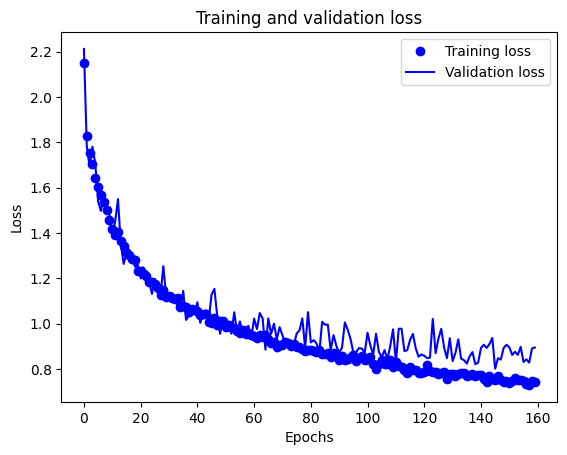

In [83]:
fig, ax = plt.subplots()
ax.plot(loss_values, 'bo', label='Training loss')
ax.plot(val_loss_values, 'b', label='Validation loss')
ax.legend()
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [84]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

Text(0, 0.5, 'Accuracy')

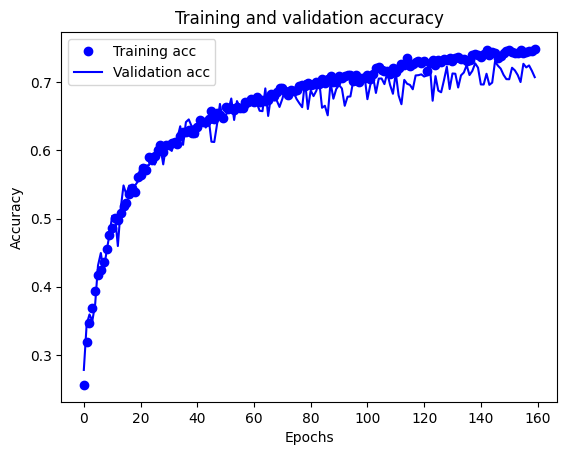

In [85]:
fig, ax = plt.subplots()
ax.plot(acc, 'bo', label='Training acc')
ax.plot(val_acc, 'b', label='Validation acc')
ax.legend()
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')